 [Mehdi Maboudi](https://www.tu-braunschweig.de/igp/mitarbeiter/maboudi/), September 2019,   
 Technical University of Braunschweig
 
 Writing Cifar10 dataset to image files as '.tif' or '.jpg'

In [113]:
import numpy as np
import matplotlib.pyplot as plt
import os

The [CIFAR-10 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 10 classes, with 6000 images per class.  
There are 50000 training images and 10000 test images.  
***
__tif__ images of CIFAR-10 will be saved in 10 subdirectories of each label under the __test__ and __train__ directories as below.


In [114]:
class_names = ['airplane',
'automobile',
'bird',
'cat',
'deer',
'dog',
'frog',
'horse',
'ship',
'truck']
nb_classes = len(class_names)

In [115]:
# # Load cifar10 training and test sets from keras
# from keras.datasets import cifar10
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [116]:
# Load cifar10 from local file
data_dir   = 'data/'
cifar10_data = np.load(data_dir + '/cifar10.npz')
X_train = cifar10_data['X_train']
y_train = cifar10_data['y_train']
X_test = cifar10_data['X_test']
y_test = cifar10_data['y_test']
print('train:',X_train.shape)
print('train_labels:',y_train.shape)
print('test:',X_test.shape)
print('test_labels:',y_test.shape)


train: (50000, 32, 32, 3)
train_labels: (50000, 1)
test: (10000, 32, 32, 3)
test_labels: (10000, 1)


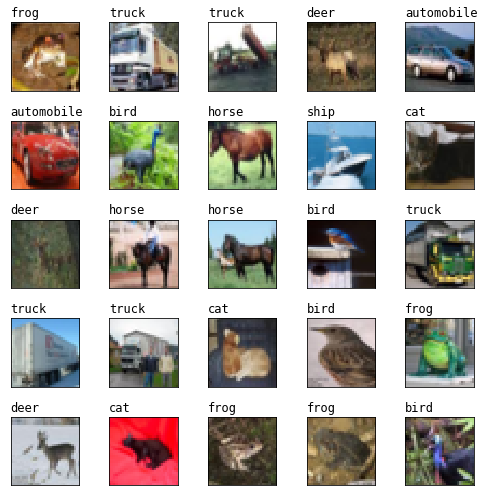

In [117]:
# VISUALIZE IMAGES
def plotImages_categories( images, labels, n_rows=5, n_cols=4, figsize=(10, 10)):
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()
    for i in range(len(axes)):
        y_train[0].astype(int)
        axes[i].imshow(images[i])        
        axes[i].set_xticks(())
        axes[i].set_yticks(())
        
        class_index = labels[i]
        title = class_names[class_index]
        axes[i].set_title(title, fontdict={'family':'monospace'}, loc='left')
    plt.tight_layout()
    plt.show()

train_labels =np.ravel(y_train)
plotImages_categories(images=X_train, labels=train_labels,n_rows=5, n_cols=5, figsize=(7, 7))

### Helper function to make directories and write images

In [120]:
images_dir = data_dir+'Cifar10_images'
def make_directories(images_dir,split):
    for dir_name in class_names:
        dir_full_path = os.path.join(images_dir+'/'+split,dir_name)
        if not os.path.exists(dir_full_path):
            os.makedirs(dir_full_path)

def write_images_to_split_directory(images,labels,split,path,start_from =1):
    assert images.shape[0]==labels.shape[0]
    n_images = images.shape[0]
    print('\nWriting',n_images,'images as',split,'in possible',nb_classes,'classes...')
    class_counter=np.zeros(nb_classes,dtype=np.int)+start_from
    for i in range(n_images):
        class_index = labels[i]
        class_  = class_names[class_index]
        destination_dir = os.path.join(images_dir,split,class_)
        filename = class_+'{:04d}'.format(class_counter[class_index])+im_format
        imageio.imwrite(destination_dir+'/'+filename, images[i],im_format)
        class_counter[class_index] +=1 
        
    print('image/class = ',class_counter)
    print('classnames',class_names)            

In [121]:
save_data = True 
# im_format = '.png'
im_format = '.tif'

if copy_data:
    import imageio #Python library for reading and writing image data

    train_labels =np.ravel(y_train)
    make_directories(images_dir,split='train')
    write_images_to_split_directory(X_train,train_labels,split='train',path=images_dir)        
    
    test_labels =np.ravel(y_test)
    make_directories(images_dir,split='test')
    write_images_to_split_directory(X_test,test_labels,split='test',path=images_dir,start_from =5001)        

print()


Writing 50000 images as train in possible 10 classes...
image/class =  [5001 5001 5001 5001 5001 5001 5001 5001 5001 5001]
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

Writing 10000 images as test in possible 10 classes...
image/class =  [6001 6001 6001 6001 6001 6001 6001 6001 6001 6001]
classnames ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']



(32, 32, 3)
(32, 32, 3)


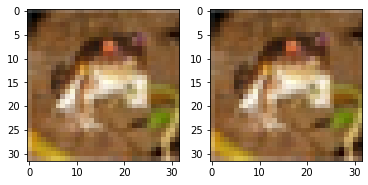

sample min & max: 0 255
source min & max: 0 255

sample patch:
 [[62 46 48 54 73]
 [20  0  8 27 51]
 [24  7 27 50 72]
 [25 20 54 63 70]
 [32 32 65 79 77]]
source patch:
 [[62 46 48 54 73]
 [20  0  8 27 51]
 [24  7 27 50 72]
 [25 20 54 63 70]
 [32 32 65 79 77]]


In [123]:
# Check results visually
sample  = imageio.imread('data/Cifar10_images/train/frog/frog0001'+im_format)
print(sample.shape)
plt.subplot(1,2,1)
plt.imshow(sample)

plt.subplot(1,2,2)
print(X_train[0].shape)
plt.imshow(X_train[0])
plt.show()

# Check results numerically
print('sample min & max:',sample.min(),sample.max())
print('source min & max:',X_train[0].min(),X_train[0].max())
print('\nsample patch:\n',sample[0:5,0:5,1])
print('source patch:\n',X_train[0,0:5,0:5,1])